## Iris Flower Classification (GradientBoost- GridSearch)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
iris=pd.read_csv('/home/shiv/Downloads/Iris.csv')

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


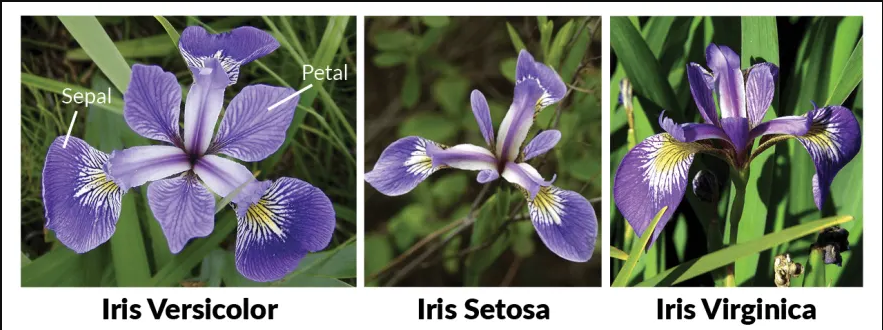

In [23]:
setosa = iris.loc[iris.Species=='Iris-setosa']
versicolor = iris.loc[iris.Species =="Iris-versicolor"]
virginica = iris.loc[iris.Species =="Iris-virfinica"]

In [37]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
iris["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [40]:
iris.groupby('Species').agg(['mean', 'median'])

Id        SepalLengthCm        SepalWidthCm         \
                  mean median          mean median         mean median   
Species                                                                  
Iris-setosa       25.5   25.5         5.006    5.0        3.418    3.4   
Iris-versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
Iris-virginica   125.5  125.5         6.588    6.5        2.974    3.0   

                PetalLengthCm        PetalWidthCm         
                         mean median         mean median  
Species                                                   
Iris-setosa             1.464   1.50        0.244    0.2  
Iris-versicolor         4.260   4.35        1.326    1.3  
Iris-virginica          5.552   5.55        2.026    2.0

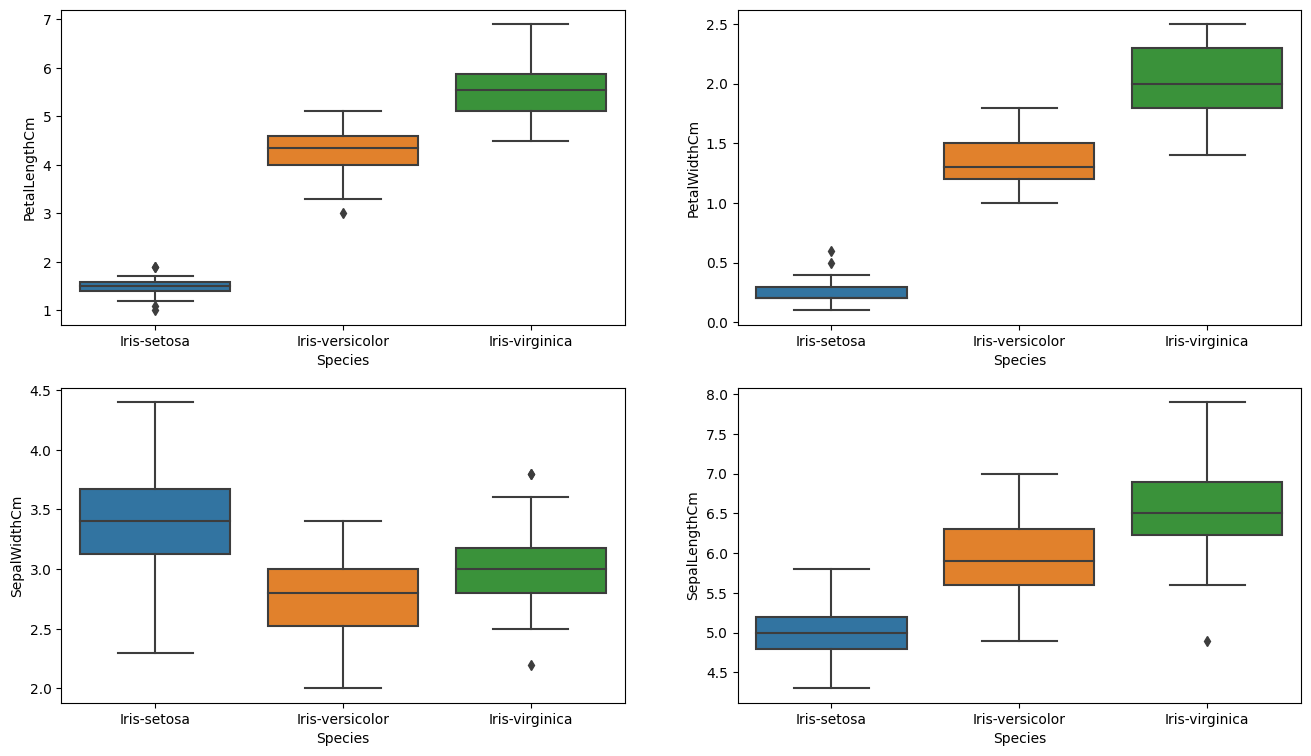

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='PetalLengthCm', x= 'Species', data=iris, orient='v' , ax=axes[0, 0])
sns.boxplot( y='PetalWidthCm', x= 'Species', data=iris, orient='v' , ax=axes[0, 1])
sns.boxplot( y='SepalWidthCm', x= 'Species', data=iris, orient='v' , ax=axes[1, 0])
sns.boxplot( y='SepalLengthCm', x= 'Species', data=iris, orient='v' , ax=axes[1, 1])
plt.show()

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

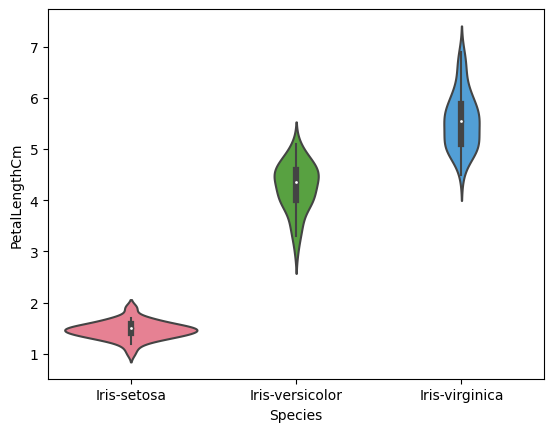

In [32]:
sns.violinplot(x="Species", y="PetalLengthCm", palette="husl", data=iris)

In [44]:
data_X = iris.drop('Species', axis=1)
data_y = iris['Species']

In [45]:
data_y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=1)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [51]:
gb_y_pred = gb_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [52]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
gb_grid_param = {'learning_rate': [0.01, 0.05, 0.1, 1],
                 'n_estimators' : [10, 50, 100, 500, 1000],
                 'max_depth': [2, 5, 8, 11],
                 'max_features': [1,2]}
gb_cv = KFold(n_splits=5)
gb_grid = GridSearchCV(GradientBoostingClassifier(), gb_grid_param, cv=gb_cv)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'max_depth': [2, 5, 8, 11], 'max_features': [1, 2],
                         'n_estimators': [10, 50, 100, 500, 1000]})

In [53]:
print('GB best Parameters:', gb_grid.best_estimator_)
print('GB best Score:', gb_grid.best_score_)

GB best Parameters: GradientBoostingClassifier(learning_rate=0.01, max_depth=2, max_features=2)
GB best Score: 1.0


In [54]:
gb_y_pred = gb_grid.predict(X_test)
print('Accuray:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))

Accuray: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Colour Image to Coloured-Sketch (OpenCV)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from IPython.display import Image

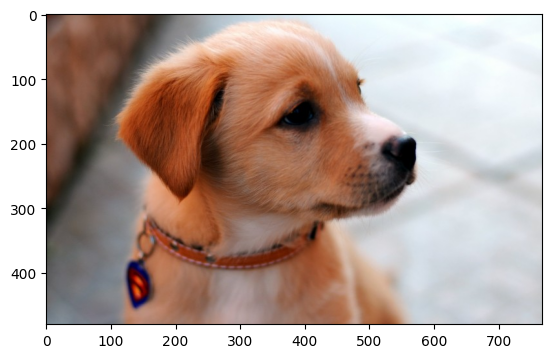

In [3]:
image = cv2.imread('/home/shiv/Pictures/dog.jpg',)
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

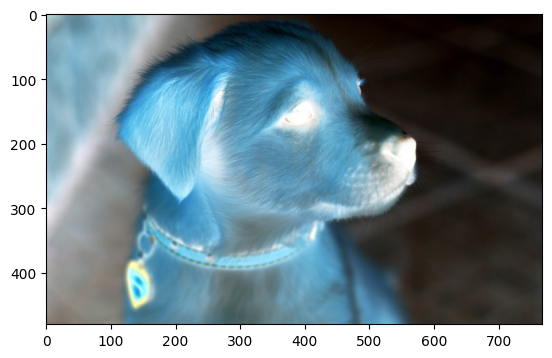

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
negative = 255 - img
plt.imshow(negative)

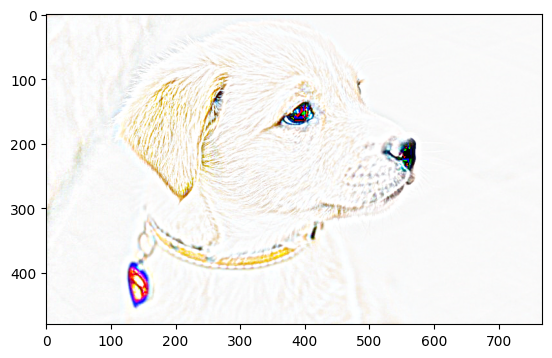

In [5]:
blured = cv2.GaussianBlur(negative,(21,21),0)

def dodge_img(x,y):
    return cv2.divide(x,255-y,scale=250)
dodged_img = dodge_img(img,blured)
plt.imshow(dodged_img)

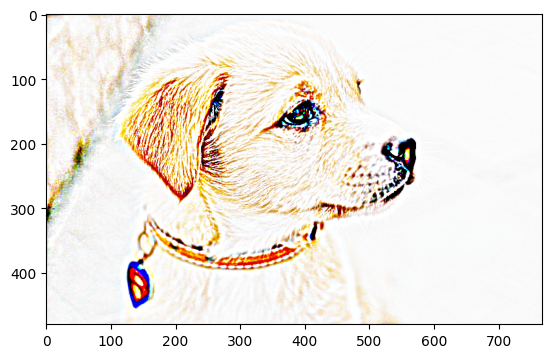

In [9]:
def burn_img(image,mask):
    return 255- (cv2.divide(255-image,255-mask,scale=200))
final_image=burn_img(dodged_img,blured)
plt.imshow(final_image)

## Exploratory Data Analysis of Terrorisom Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [7]:
path ='/home/shiv/Downloads/archive/globalterrorismdb_0718dist.csv'
df = pd.read_csv(path, encoding='latin1')
df.head()

/tmp/ipykernel_12588/3511700926.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.rename(columns={'iyear':'Year','imonth':'Month', 'iday':'Day', 'country_txt':'Country', 'region_txt':'Region', 'provstate':'Provstate', 'city':'City', 
                   'attacktype1_txt':'Attacktype', 'target1':'Target','nkill':'Nkill', 'nwound':'Nwound','summary':'Summary', 
                   'weaptype1_txt':'Weaptype','motive':'Motive', 'crit1':'Crit1', 'crit2':'Crit2', 'crit3':'Crit3', 'success':'Success', 'suicide':'Suicide', 
                   'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 'natlty3_txt':'Natlty3',
                   'gname':'Gname', 'guncertain1':'Guncertain1', 'claimed':'Claimed'}, inplace=True)

In [11]:
data = df[[ 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound', 'Motive']]

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Country      181691 non-null  object 
 2   Region       181691 non-null  object 
 3   Provstate    181270 non-null  object 
 4   City         181256 non-null  object 
 5   Crit1        181691 non-null  int64  
 6   Crit2        181691 non-null  int64  
 7   Crit3        181691 non-null  int64  
 8   Success      181691 non-null  int64  
 9   Suicide      181691 non-null  int64  
 10  Attacktype   181691 non-null  object 
 11  Targtype     181691 non-null  object 
 12  Natlty1      180132 non-null  object 
 13  Gname        181691 non-null  object 
 14  Guncertain1  181311 non-null  float64
 15  Claimed      115571 non-null  float64
 16  Weaptype     181691 non-null  object 
 17  Nkill        171378 non-null  float64
 18  Nwound       165380 non-

In [12]:
print('Country with the highest number of Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with the highest number of  Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum number of people were killed by a single terrorist attack are',data['Nkill'].max(),'people that took place in',data.loc[data['Nkill'].idxmax()].Country)
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Group with the most attacks:",data['Gname'].value_counts().index[1]) #as most attack was done by unknown we are taking the next group name
print("Most Attack Types:",data['Attacktype'].value_counts().idxmax())

Country with the highest number of Terrorist Attacks: Iraq
Regions with the highest number of  Terrorist Attacks: Middle East & North Africa
Maximum number of people were killed by a single terrorist attack are 1570.0 people that took place in Iraq
Year with the most attacks: 2014
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


In [16]:
data['Year'].value_counts(dropna = False).sort_index()

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64

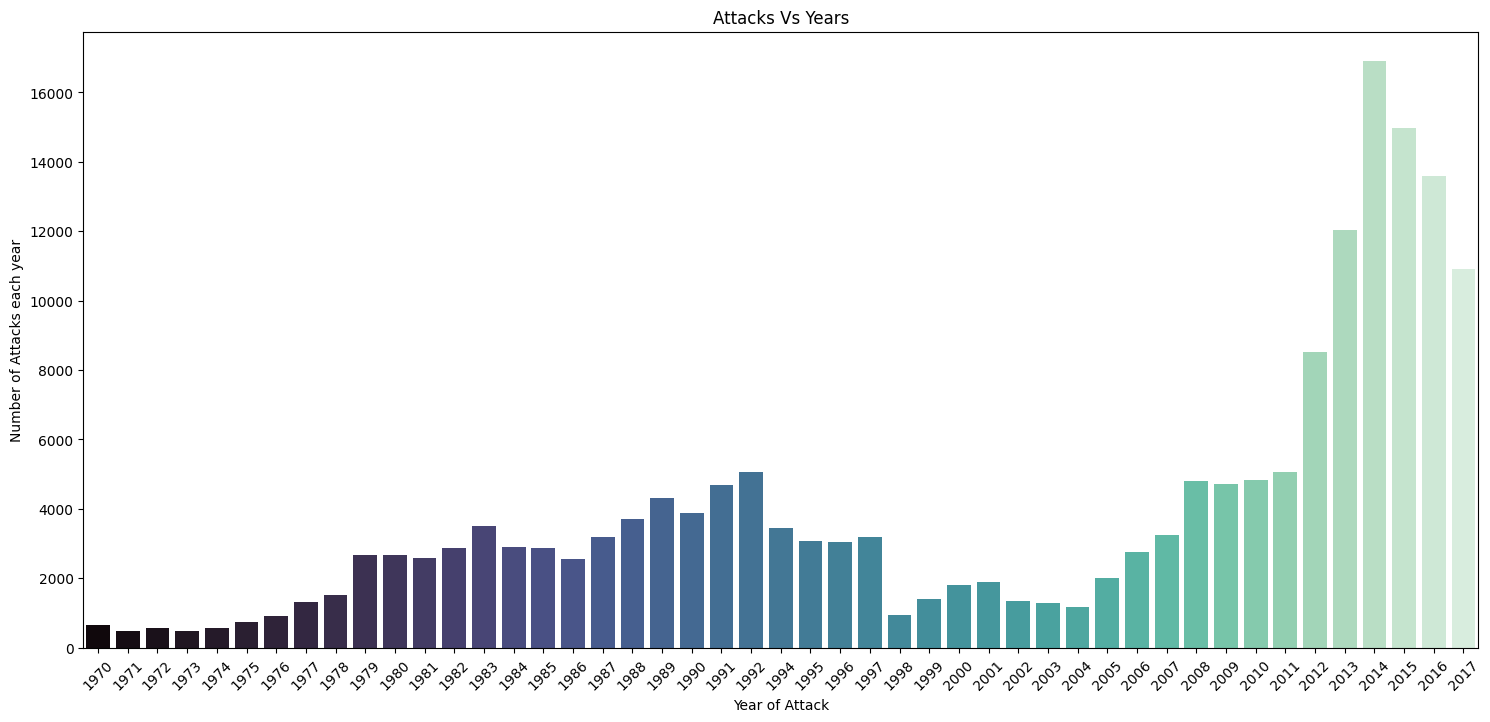

In [17]:
x_year = data['Year'].unique()
y_count_years = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,8))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'mako')
plt.xticks(rotation = 45)
plt.xlabel('Year of Attack')
plt.ylabel('Number of Attacks each year')
plt.title('Attacks Vs Years')
plt.show()

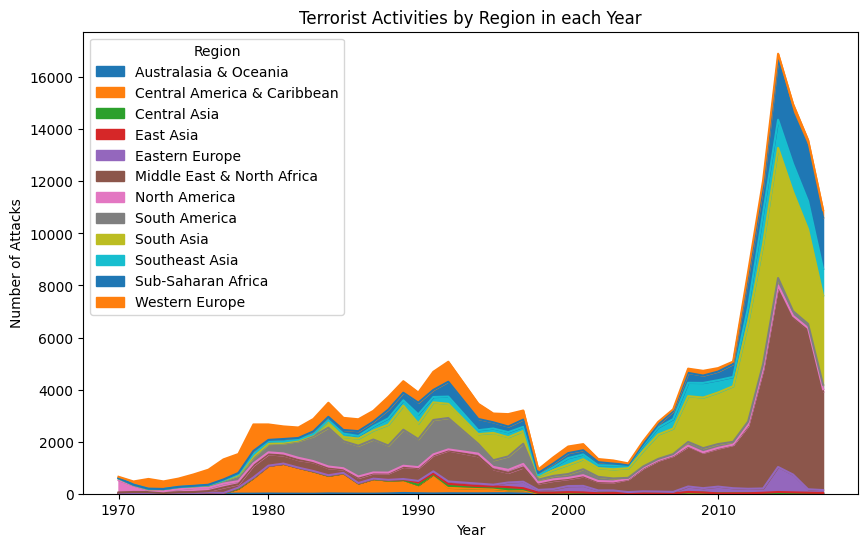

In [18]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(10,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [19]:
data['Nwound'] = data['Nwound'].fillna(0).astype(int)
data['Nkill'] = data['Nkill'].fillna(0).astype(int)
data['Damage'] = data['Nkill'] + data['Nwound']

/tmp/ipykernel_12588/3380639452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nwound'] = data['Nwound'].fillna(0).astype(int)
/tmp/ipykernel_12588/3380639452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Nkill'] = data['Nkill'].fillna(0).astype(int)
/tmp/ipykernel_12588/3380639452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

#### Top Worst Terror Attacks in History from 1970 to 2017

In [21]:
terror1 = data.sort_values(by='Damage',ascending=False)[:40]
heat=terror1.pivot_table(index='Country',columns='Year',values='Damage')
heat.fillna(0,inplace=True)
heat.head(10)

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,536.0,0.000000,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1161.0,0.0,0.000000,0.0,0.000000,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,520.000000,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,702.0,0.0,833.333333,0.0,654.0,1064.333333,0.0,911.666667,0.0
Japan,0.0,0.0,0.0,507.0,3092.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0
Kenya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4224.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0


#### Analysing the Weapon Type

In [22]:
print(data['Weaptype'].unique())

['Unknown' 'Explosives' 'Incendiary' 'Firearms' 'Chemical' 'Melee'
 'Sabotage Equipment'
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)'
 'Fake Weapons' 'Radiological' 'Other' 'Biological']


In [23]:
data['Weaptype'].value_counts()

Weaptype
Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                            

In [25]:
weaptype_filtered =data['Weaptype'].apply(lambda x: x if x in ['Explosives','Firearms','Unknown',
                                                               'Incendiary'] else 'Others')
weaptype = weaptype_filtered.value_counts().tolist()
weaptype_filtered.unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Others'],
      dtype=object)

In [26]:
weaptype_filtered.value_counts()

Weaptype
Explosives    92426
Firearms      58524
Unknown       15157
Incendiary    11135
Others         4449
Name: count, dtype: int64

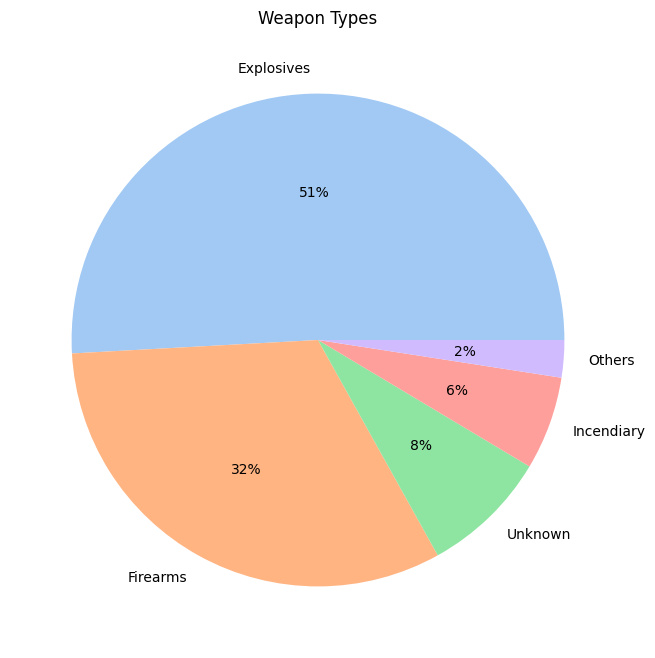

In [27]:
weap_labels = ['Explosives','Firearms','Unknown','Incendiary','Others']
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.figure(figsize=(16, 8))
plt.title('Weapon Types')
plt.pie(weaptype, labels = weap_labels, colors = colors, autopct='%.0f%%')
plt.show()